In [1]:
'''
Business Case: Product Sales Forecasting

'''

'\nBusiness Case: Product Sales Forecasting\n\n'

In [2]:
#Importing libraries and data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Overview of The Dataset

In [3]:
#Loading the dataset
train_data = pd.read_csv('TRAIN.csv')
test_data = pd.read_csv('TEST_FINAL.csv')

In [4]:
#Checking number of rows & columns in data
train_data.shape

(188340, 10)

In [5]:
# There are 10 columns & 188340 rows in train dataset.

In [6]:
#Reading & Displaying the data. Head is used to display top values in the Dataframe.
train_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [7]:
test_data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [8]:
#Summary of dataframe. To check if there are any missing values in the dataset, and to know the data type of each column
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [9]:
# Insight:
# Date should be of data type date time.
# We can see there are no missing values in the dataset.

In [10]:
#Checking data description in dataframe
train_data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [11]:
#Checking statistical summary of object columns
train_data.describe(include = 'object')

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1000001,S1,L1,R1,2018-01-01,No
freq,1,88752,85140,63984,365,104051


In [12]:
# Insights:

# There are 188340 unique IDs in the train dataset.
# The mean sales is roughly 42784 we can also see some outliers where the max sale is 247215.
# The mean numbers of orders is roughly 68 we can also see some outliers where the max number of orders is 371.
# There are in total 4 unique store types in the dataset with S1 being the most frequent one.
# There are in total 5 unique Location type of which L1 is the most frequent one.
# There are in total 4 unique region codes of which R1 is the most frequent one.

In [13]:
#Checking if there is any null value present in any column. If yes,count the null values in each column.
train_data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [14]:
# There are no missing values in the Dataset.

In [15]:
train_data.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [16]:
#The train data set contains 365 stores, with 4 store types spread across 5 location types and 4 region codes.

In [17]:
train = train_data.copy()
test = test_data.copy()

# Data Pre Processing

In [18]:
# Converting Date to date_time datatype:
train["Date"]=  pd.to_datetime(train["Date"])
test["Date"]=  pd.to_datetime(test["Date"])

# Univariate Analysis

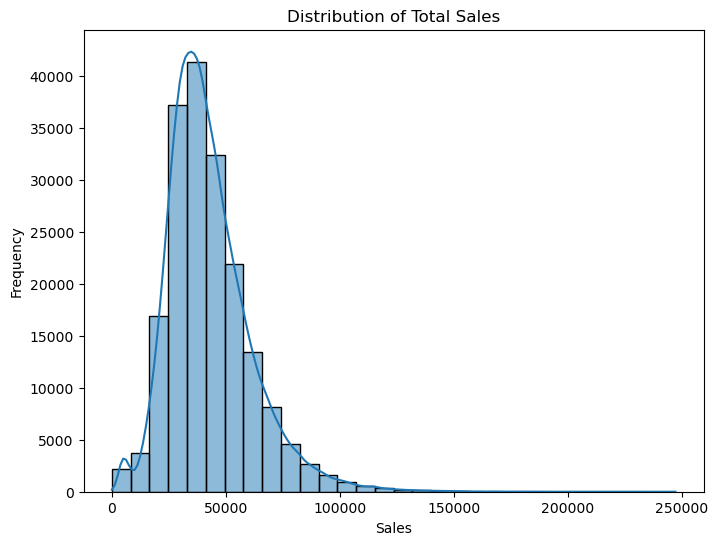

In [19]:
#Distribution of --
plt.figure(figsize=(8, 6))
sns.histplot(train['Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Insights:

# 1.The distribution of sales seems to be positively skewed (right-skewed), 
# which indicates that there are fewer examples of greater sales and that most sales values are focused on the lower end.
# 2.The far right tail (over 100,000) shows a few outliers these could indicate occasional high-value transactions.
# 3.The histogram's peak indicates that the majority of sales values are in the range of $30,000 to $50,000. 

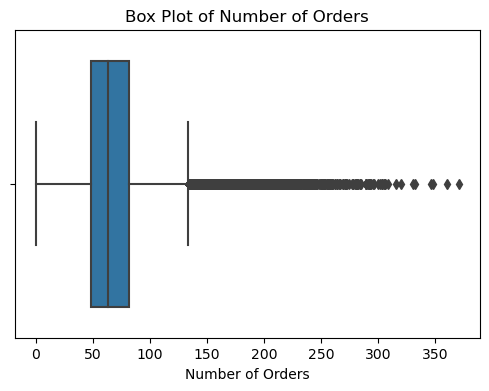

In [21]:
#Number of Orders:
plt.figure(figsize=(6, 4))
sns.boxplot(x=train['#Order'])
plt.title('Box Plot of Number of Orders')
plt.xlabel('Number of Orders')
plt.show()

In [22]:
# Insights:

# 1.The median number of orders, is approximately 75.This indicates that there are about 75 orders per day on average.
# 2.Interquartile Range (IQR), between approximately 50 and 100 orders, shows where the middle 50% of your orders lie. 
# 3.The range of whiskers is around 0 to 150 orders. This indicates that this region contains the majority of the data.
# 4.There are several outliers beyond the upper whisker, with values ranging from approximately 150 to 350 orders. 
# These outliers indicate days with exceptionally high order volumes, 
# which might be due to special promotions, discounts, seasonal peaks, or other unique factors.

# Business Implications:
 
# 1. Staffing and inventory can be optimized to handle the typical order volume efficiently.
# 2.Peak Period Management: According to the outliers, there are times when order volumes are noticeably greater. 
# Having extra inventory and resources ready for these peaks will help to efficiently handle these periods with greater demand.
# 4. Analyzing Outliers: Investigate the factors that lead to the outlier days to replicate successful strategies or promotions. 
# This can help increase the frequency of high-order days.
# 5. Risk Management: Knowing the variability in orders helps in managing risks. 
# Techniques can be created to keep performance consistent even when orders unexpectedly increase or decrease.

# Bivariate Analysis: 

In [23]:
#Sales Distribution by Store Type
#Frequency Table
store_type_sales = train.groupby('Store_Type')['Sales'].sum().reset_index()
store_type_sales

,Store_Type,Sales
0,S1,3.343866e+09
1,S2,7.955308e+08
2,S3,1.165658e+09
3,S4,2.752946e+09


In [24]:
train.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

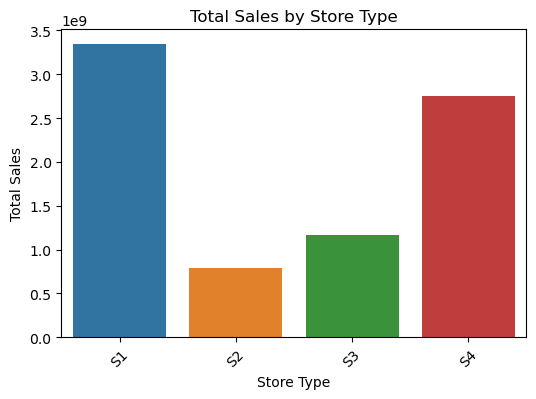

In [25]:
#Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Store_Type', y='Sales', data=store_type_sales)
plt.title('Total Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Insights:

# 1. S1 has the highest total sales (with values close to 3.5 billion), followed by S4 (with value reaching to approx 3 billion). 
# 2. With the largest contribution to total revenue, S1 seems to be the most prevalent store category.
# 3. S3 and S2 have comparatively smaller overall sales, suggesting them to be underperforming.

# Business Implications:

# 1. Concentrate on top performers (S1 and S4)
# 2. The company may replicate the effective tactics employed by these store types in underperforming store types.
# Assess and enhance S2: To increase sales, it could be necessary to look into and restructure S2's operations, 
# such as pricing, inventory control, and promotions.

In [27]:
#Sales Distribution by Location Type
#Frequency Table
location_type_sales = train.groupby('Location_Type')['Sales'].sum().reset_index()
location_type_sales

,Location_Type,Sales
0,L1,3.529359e+09
1,L2,2.872964e+09
2,L3,9.897865e+08
3,L4,3.149745e+08
4,L5,3.509163e+08


In [28]:
train.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

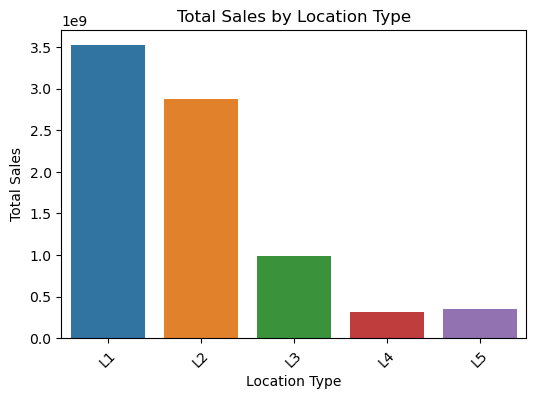

In [29]:
#Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Location_Type', y='Sales', data=location_type_sales)
plt.title('Total Sales by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Insights:

# 1. L1 has the highest total sales, with values close to 3.5 billion. 
# 2. L2 isn't far behind at 3 billion. This suggests that these location types are significantly more profitable.
# 3. There's a notable drop to L3, with sales around 1 billion. 
# 4. Both L4 and L5 bring in the lowest sales, hovering around 0.5 billion each. 
# This shows they're underperforming, making them the least profitable locations.

# Business Implications:

# 1. Looks like focusing on L1 and L2 locations could be the best strategy for maximizing profits.

In [31]:
#Sales Distribution by Region
#Frequency Table
region_sales = train.groupby('Region_Code')['Sales'].sum().reset_index()
region_sales

,Region_Code,Sales
0,R1,2.992243e+09
1,R2,2.170172e+09
2,R3,1.870205e+09
3,R4,1.025381e+09


In [32]:
train.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

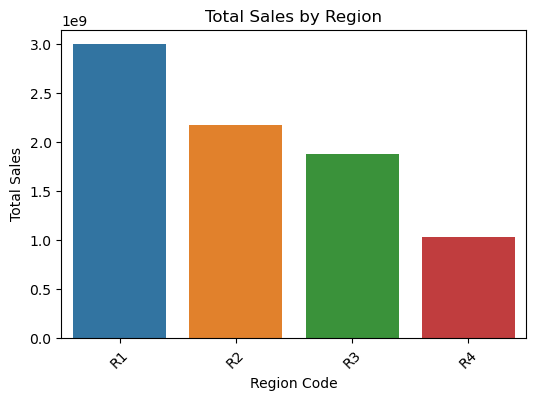

In [33]:
#Bar Chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Region_Code', y='Sales', data=region_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [34]:
# Insights:

# 1. Region R1 stands out with the highest total sales at around 3.0 billion. 
# 2. Region R4 has the lowest total sales, approximately 1.2 billion. 

# Business Implications:

# 1. Focus on High-Performing Regions: The areas with the highest sales should receive the majority of marketing and investment. 
# 2. This can assist them maximise their profits and strengthen their standing in the market.
# 3. Address Underperformance: Underperforming regions need a more in-depth analysis. 

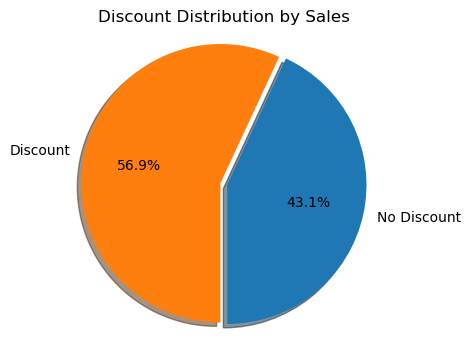

In [35]:
# Discount distribution
discount = train.groupby(['Discount'], as_index=False)['Sales'].mean()    
discount['Discount'] = discount['Discount'].astype(str)

# Visualization
fig = plt.figure(figsize =(4, 4))
plt.pie(discount['Sales'], labels=['No Discount', 'Discount'], explode=(0.05, 0),
        autopct='%1.1f%%', shadow=True, startangle=270)
plt.title("Discount Distribution by Sales")        
plt.axis('equal')
plt.show()

In [36]:
# Insights:

#1.56.9% of sales involve discounts. This indicates that over half of the sales are driven by discounted prices, 
#showcasing the significant impact of discounts on customer purchase behavior.
#2. 43.1% of sales occur without discounts. 
# This substantial proportion implies that while discounts are important, 
# a significant number of customers are still willing to pay full price.

# Business Implications:

# 1. Pricing Strategy: Since discounts are important, keeping or expanding them could increase sales even more. 
# 2. To prevent reducing profit margins, a balance must be struck.
# 3. Targeted Marketing: Marketing tactics may be adjusted to emphasise deals in order to attract budget-conscious customers. 
# 4. Discount strategies need to be thoroughly considered to ensure that they improve overall profitability.
# 5. Inventory Management: Providing discounts could help move inventory more quickly, save storage costs, 
# and make room for new products. Inventory levels must be monitored and adjusted to avoid stockouts or overstock scenarios.

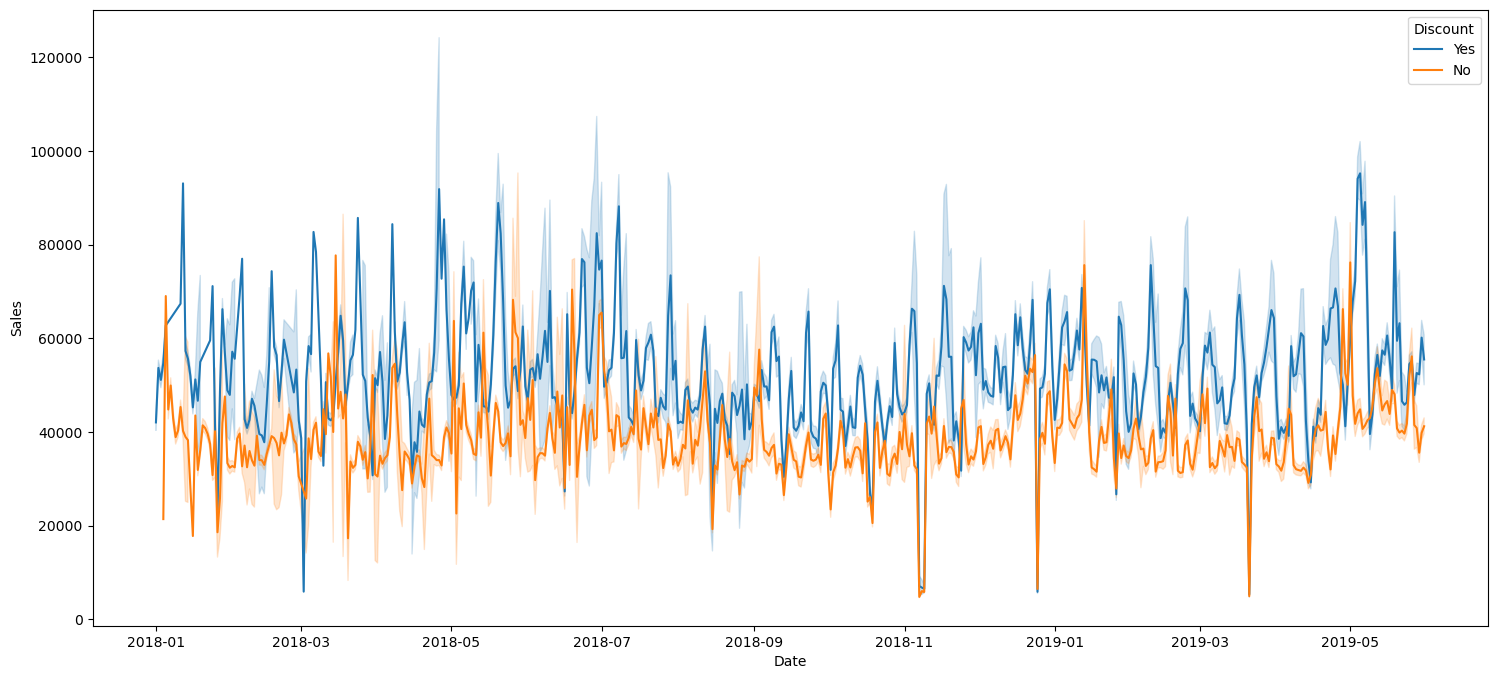

In [37]:
# Multivariate Analysis:
plt.figure(figsize =(18, 8))
sns.lineplot(data=train, x="Date", y=(train['Sales']),hue='Discount')
plt.show()

In [38]:
# Insights about sales patterns from January 2018 to May 2019:

# 1. Compared to sales without discounts (orange line), sales with discounts (blue line) exhibit higher peaks 
# and more unpredictability. This suggests that sales are significantly increased by discount offers.
# 2. Seasonal Trends: The graph's recurring spikes imply that promotional events or seasonal trends may have an impact on sales.

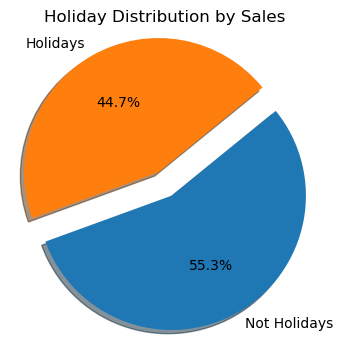

In [39]:
# Holidays Distribution
holiday = train.groupby(['Holiday'], as_index=False)['Sales'].mean()    
holiday['Holiday'] = holiday['Holiday'].astype(str)

# Visualization
fig = plt.figure(figsize =(4, 4))
plt.pie(holiday['Sales'], explode=(0.2, 0), labels=['Not Holidays', 'Holidays'],
        autopct='%1.1f%%', shadow=True, startangle=200)
plt.title("Holiday Distribution by Sales")          
plt.axis('equal')
plt.show()

In [40]:
# Insights:

# 1. 55.3% of sales occur during non-holidays, while 44.7% happen during holidays. 
# This suggests that regular periods still hold a slight edge in total sales over holidays.
# 2.Nearly half of the sales are driven by holidays, underscoring the importance of these periods for business performance.

# Business Implications:

# 1.Since holidays account for a substantial portion of sales, investing in targeted holiday promotions can 
# significantly boost revenue. Planning special events, discounts, and marketing campaigns around these periods is crucial.
# 2. Maintaining a strong sales performance during non-holidays means consistently engaging customers with value 
# propositions and regular promotions. Ensuring year-round customer engagement can balance sales distribution.
# 3.Efficient inventory planning is essential to handle the increased demand during holidays without causing stockouts or 
# excess inventory during non-holiday periods.

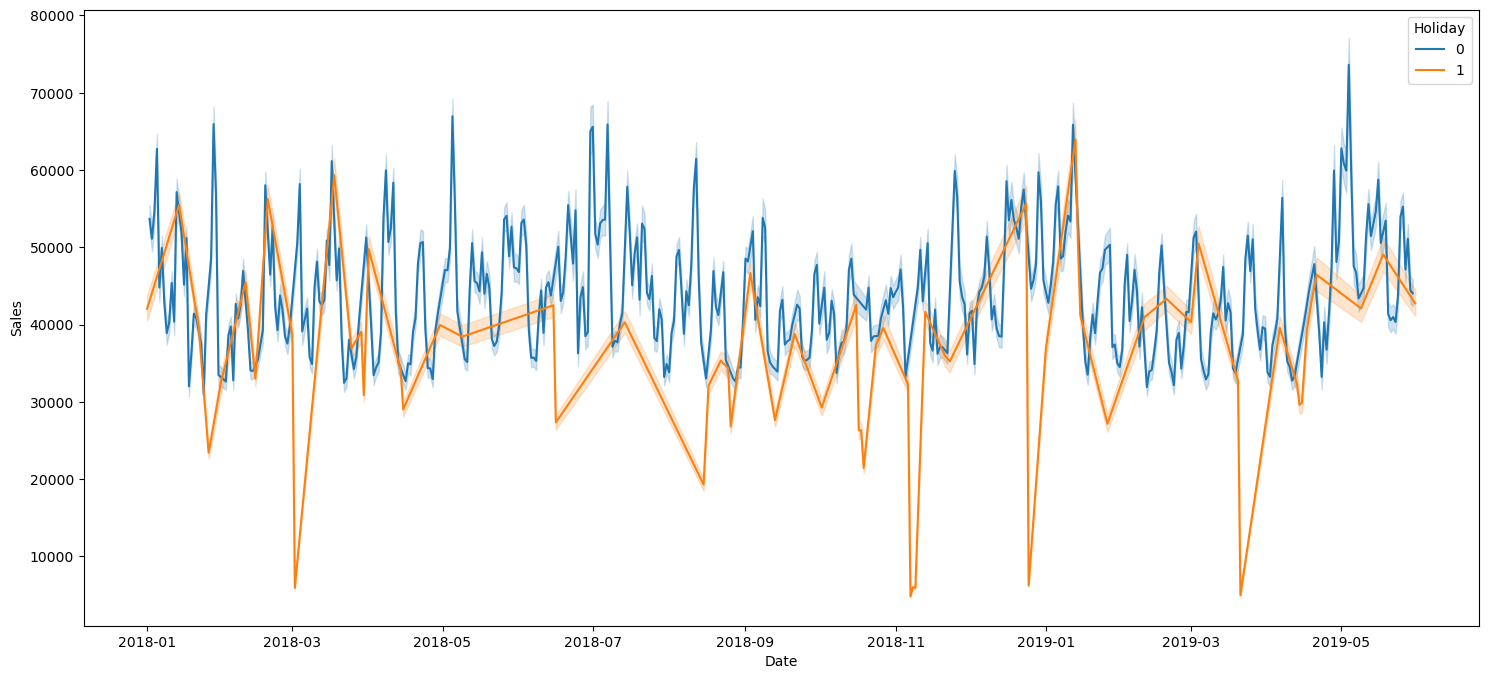

In [41]:
plt.figure(figsize =(18, 8))
sns.lineplot(data=train, x="Date", y=(train['Sales']),hue='Holiday')
plt.show()

In [42]:
# Insights:

# 1. During the studied period, holdays sales showed huge dips compared to regular days. 

Correlation between oder and sales: 0.9416005646125768


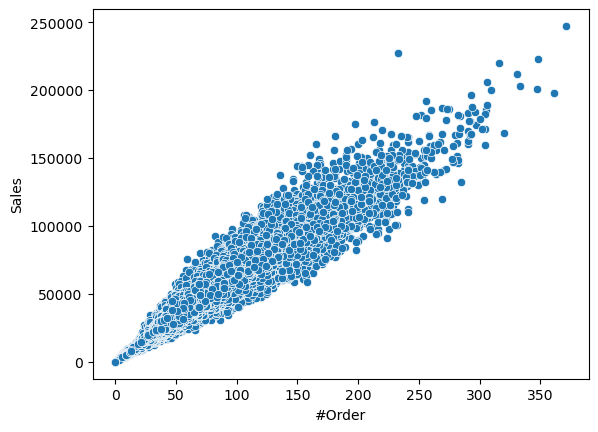

In [43]:
#Correlation between Orders & sales
correlation = train['#Order'].corr(train['Sales'])
print("Correlation between oder and sales:",correlation)
sns.scatterplot(x=train['#Order'],y=train['Sales'])
plt.show()

In [44]:
# Insights:

# 1. Strong Positive Correlation: As the number of orders increases, sales also rise. 

# Business Implications:
# 1. Focusing on strategies that enhance order volume, including marketing campaigns, promotions, or loyalty programs, 
# can significantly boost sales. 

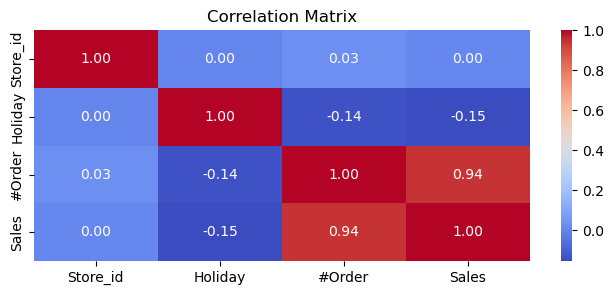

In [45]:
#Correlation Matrix
correlation_matrix = train.corr()
plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [46]:
# Insights:

# 1. Holiday: Slight negative correlation with #Order (-0.14) and Sales (-0.15). 
# 2. Holidays tend to see a slight reduction in both orders and sales, 
# possibly due to fewer shopping days or reduced store hours.
# 3. Order and Sales: The two variables have a very strong positive correlation (0.94), 
# confirming that more orders translate into more sales.

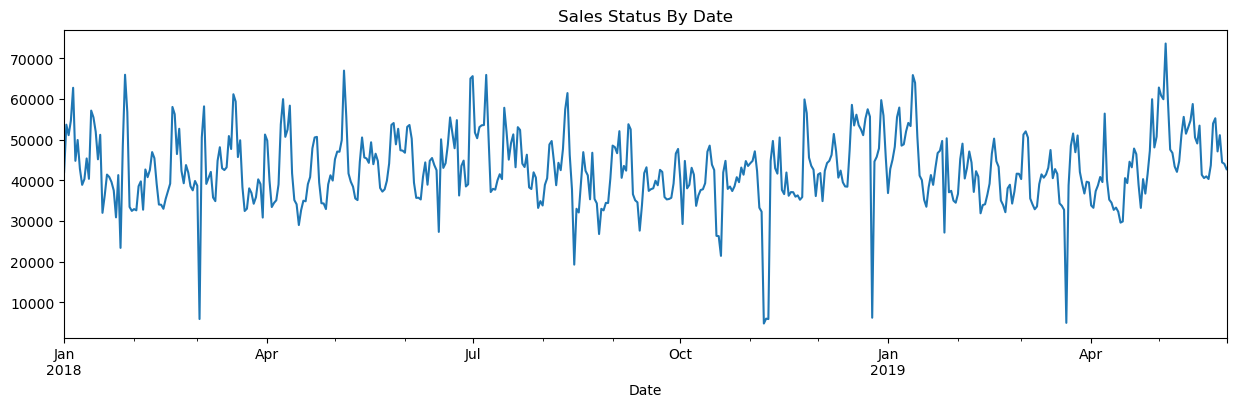

In [47]:
#3.	Time Series Analysis

train['year'] = train['Date'].dt.year 
train['month'] = train['Date'].dt.month 
train["day"] = train["Date"].dt.day

train.groupby("month")[["#Order","Sales"]].describe().T

custgroup=train.groupby('Date').mean()
plt.figure(figsize=(15,4))
custgroup['Sales'].plot(x=train.Date)
plt.title("Sales Status By Date")
plt.show()

In [48]:
# Insights about the sales performance from January 2018 to May 2019:

# 1. The sales figures reveal peaks in January, May, July, and November, indicating seasonal sales tied to events or holidays.
# 2. Every quarter shows peaks, possibly linked to promotions or market trends boosting sales.
# 3. Sales show consistent growth, with peaks in January and April 2019, reflecting year-over-year improvement.
# 4. Periodic drops occur between peaks in seasonal businesses, indicating off-peak sales seasons.

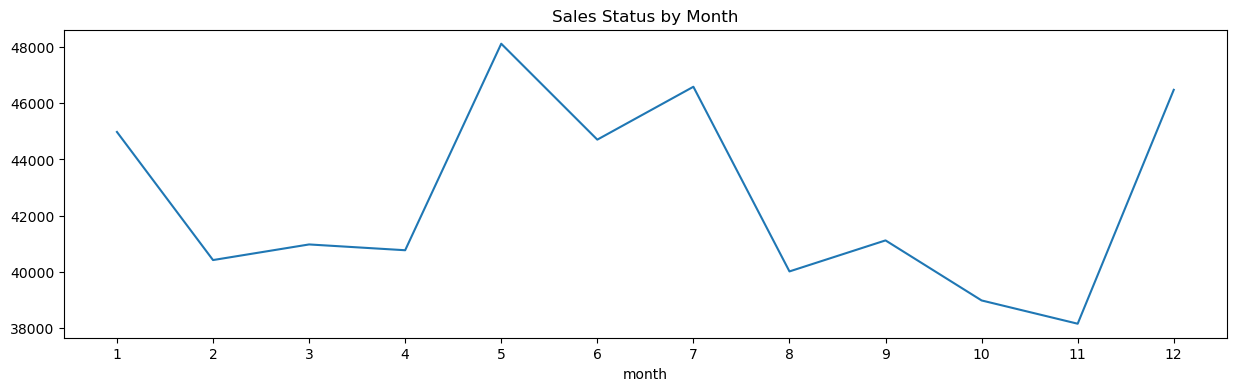

In [49]:
custgroup=train.groupby('month').mean()
fig,ax=plt.subplots(figsize=(15,4))
ax.xaxis.set(ticks=range(0,13))
custgroup['Sales'].plot(x=train.Date)
plt.title("Sales Status by Month")
plt.show()

In [50]:
# Insights:

# 1. January sales start strong, possibly due to New Year promos or holiday shopping.
# 2. There's a noticeable drop in February, possibly due to post-holiday slowdowns.
# 3. Sales peak in May due to seasonal trends or successful marketing campaigns.
# 4. In July, there is a mid-year peak, possibly due to summer sales or holiday shopping.
# 5. October shows a low point, which may be an off-peak period before the holiday season kicks in.
# 6. Sales rise sharply again in December, likely driven by holiday shopping and end-of-year promotions.

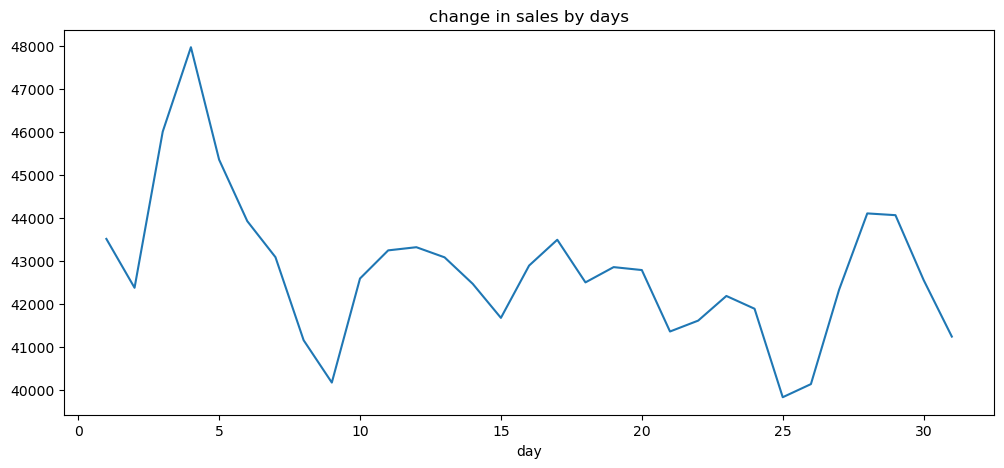

In [51]:
custgroup=train.groupby('day').mean()
plt.figure(figsize=(12,5))
custgroup['Sales'].plot(x=train.Date)
plt.title("change in sales by days")
plt.show()

In [52]:
# Insights:

# 1. In the early month, sales peak around 48,000 by day 5, 
# indicating that early promotions/events play a significant role in driving sales.
# 2. Sales sharply drop to around 40,000 by day 10, 
# hinting at a mid-month lull which may stem from customers waiting for payday or end-of-month deals.
# 3. Sales gradually recover post-mid-month slump, 
# indicating a month-end rebound possibly from boosted promotions or customer spending patterns.

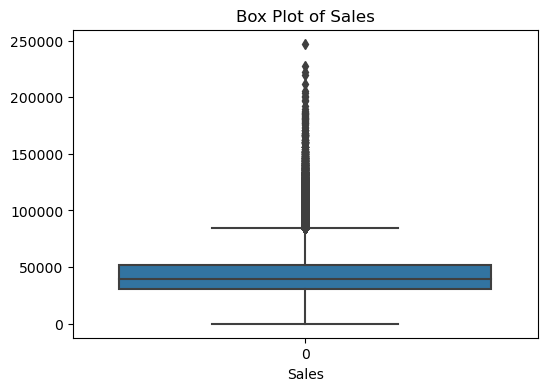

In [53]:
#OUTLIER DETECTION:
#Visualize Initial Data
plt.figure(figsize=(6, 4))
sns.boxplot(train['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

In [54]:
# Insights:

# 1. Numerous high sales outliers beyond the upper whisker may indicate exceptional performances tied to promotions, 
# disounts, or bulk purchases.

In [55]:
#Identify Outliers Using the IQR Method
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Sales'].quantile(0.25)
Q3 = train['Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Sales'] < lower_bound) | (train['Sales'] > upper_bound)]
print("Number of outliers:", len(outliers))


Number of outliers: 5843


In [56]:
#Handle Outliers

# Calculate Q1, Q3, and IQR
q1 = train['Sales'].quantile(0.25)
q3 = train['Sales'].quantile(0.75)
iqr = q3 - q1

# Calculate outlier thresholds
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr

# Calculate the median
med = np.median(train['Sales'])

# Replace outliers with the median
train['Sales'] = np.where((train['Sales'] < Lower_tail) | (train['Sales'] > Upper_tail), med, train['Sales'])


In [57]:
#Final Check for Outliers
Q1 = train['Sales'].quantile(0.25)
Q3 = train['Sales'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = train[(train['Sales'] < lower_bound) | (train['Sales'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 2208


# Data Preparation for Model Training

In [58]:
#Droping ID,Date,'#Order' from train data set
train = train.drop(['year', 'day', 'month'],axis=1)

# Feature Engineering

In [59]:
# Creating Features from date column.

def create_date_features(df):
    df['Year'] =  df['Date'].dt.year
    df['Month'] =  df['Date'].dt.month
    df['Day'] =  df['Date'].dt.day
    df['Week'] =  df['Date'].dt.week 
    df['Quarter'] =  df['Date'].dt.quarter 
    return df

In [60]:
train_2 = create_date_features(train)
test_2 = create_date_features(test)

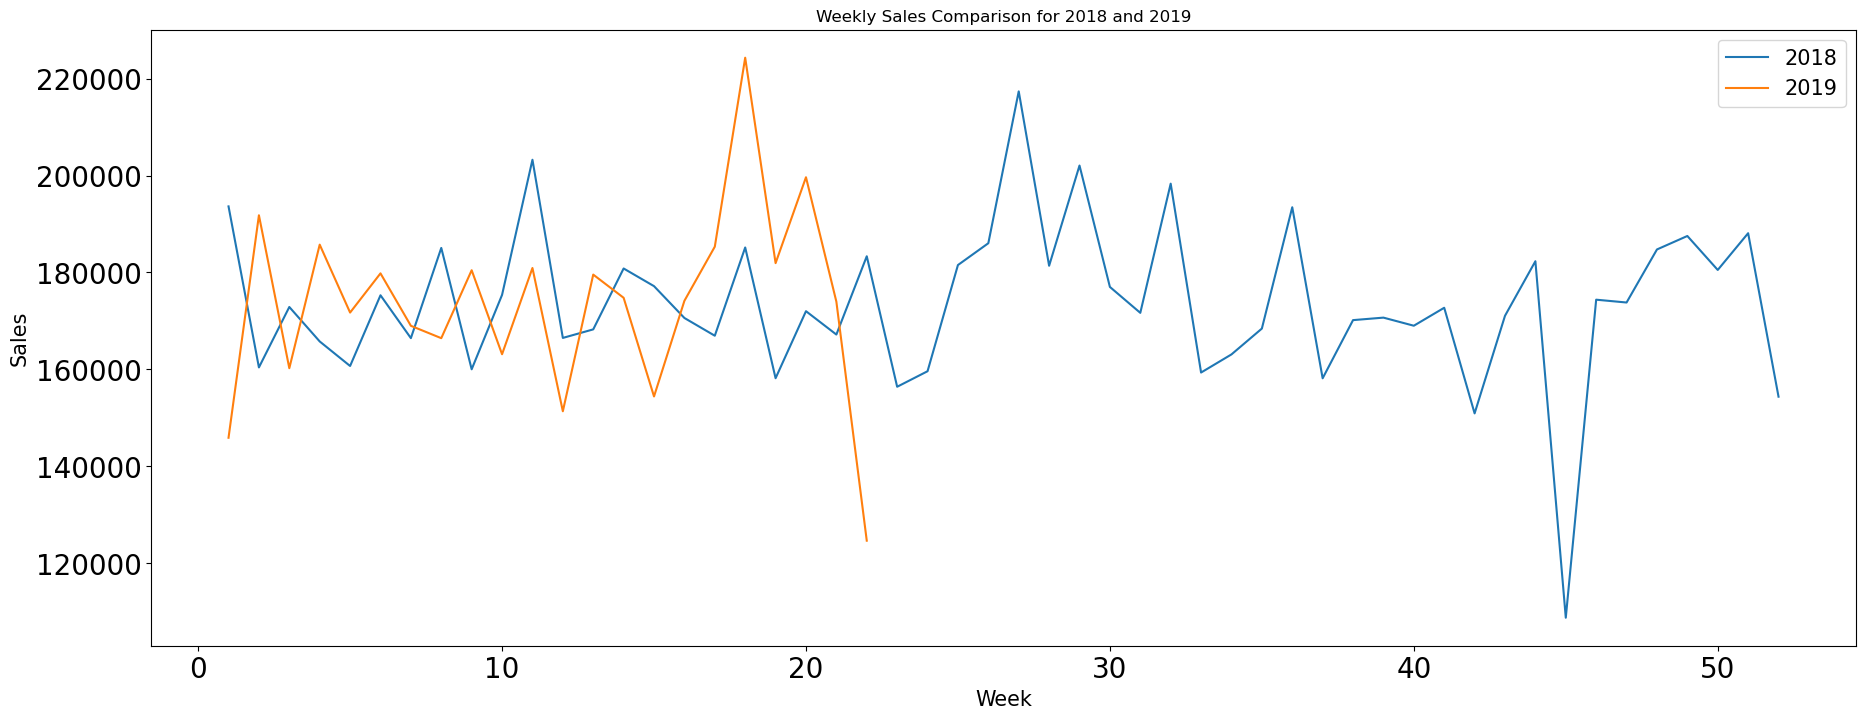

In [61]:
Daily_Sales_2018 = train_2[train_2.Year == 2018].groupby('Week')['#Order'].sum()
Daily_Sales_2019 = train_2[train_2.Year == 2019].groupby('Week')['#Order'].sum()

plt.figure(figsize=(22,8))
plt.plot(Daily_Sales_2018.index, Daily_Sales_2018.values)
plt.plot(Daily_Sales_2019.index, Daily_Sales_2019.values)

plt.xlabel('Week', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.title("Weekly Sales Comparison for 2018 and 2019")
plt.xticks(fontsize=20)
plt.yticks( fontsize=20)
plt.legend(('2018','2019'),prop= {'size':15})
plt.show()

In [62]:
# Insights:
# 2019's sales start lower than 2018's but quickly surpass 2018 around week 3, maintaining a stronger performance until week 20.
# Both years show peaks around week 20, with 2018 seeing additional peaks around weeks 30 and 45. 
# 2018 shows a sharp drop in sales around week 45 but a slight recovery afterward.
# This could indicate post-holiday slowdown or inventory clearances.

In [63]:
#preparing the data for training a machine learning model by excluding the target variable Sales.
train_x = train_2.loc[:,train_2.columns!='Sales']

# Creating Validation Set

In [64]:
#Train set:- Data before April 2019
#Validation Set:- Data After April 2019
#KFold CV on train

tr_x = train_x[train_2.Date<'2019-04-01']
val_x = train_x[train_2.Date>='2019-04-01']
tr_y = train_2[train_2.Date<'2019-04-01']['Sales']
val_y = train_2[train_2.Date>='2019-04-01']['Sales']

# Feature Scaling

In [65]:
tr_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166075 entries, 0 to 166074
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             166075 non-null  object        
 1   Store_id       166075 non-null  int64         
 2   Store_Type     166075 non-null  object        
 3   Location_Type  166075 non-null  object        
 4   Region_Code    166075 non-null  object        
 5   Date           166075 non-null  datetime64[ns]
 6   Holiday        166075 non-null  int64         
 7   Discount       166075 non-null  object        
 8   #Order         166075 non-null  int64         
 9   Year           166075 non-null  int64         
 10  Month          166075 non-null  int64         
 11  Day            166075 non-null  int64         
 12  Week           166075 non-null  int64         
 13  Quarter        166075 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(5)
memory usa

In [66]:
numcols = list(tr_x.select_dtypes(exclude = 'object').columns)
for i in ['#Order','Store_id','Year','Month','Day','Week','Quarter']:
    print(i)
    numcols.remove(i)
numcols.remove('Date')

#Order
Store_id
Year
Month
Day
Week
Quarter


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(tr_x[numcols])
tr_x[numcols] = scaler.transform(tr_x[numcols])
val_x[numcols] = scaler.transform(val_x[numcols])
test[numcols] = scaler.transform(test[numcols])

In [68]:
tr_x.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Year,Month,Day,Week,Quarter
0,T1000001,1,S1,L3,R1,2018-01-01,1.0,Yes,9,2018,1,1,1,1
1,T1000002,253,S4,L2,R1,2018-01-01,1.0,Yes,60,2018,1,1,1,1
2,T1000003,252,S3,L2,R1,2018-01-01,1.0,Yes,42,2018,1,1,1,1
3,T1000004,251,S2,L3,R1,2018-01-01,1.0,Yes,23,2018,1,1,1,1
4,T1000005,250,S2,L3,R4,2018-01-01,1.0,Yes,62,2018,1,1,1,1


# Feature Encoding

In [69]:
# One Hot Encoding
l = ['Store_Type','Location_Type','Region_Code']
tr_x = pd.get_dummies(tr_x, columns = l,drop_first=True)
val_x = pd.get_dummies(val_x, columns = l,drop_first=True)
test = pd.get_dummies(test, columns = l,drop_first=True)

In [70]:
tr_x['Discount'] = tr_x['Discount'].replace({'Yes':1,'No':0})
val_x['Discount'] = val_x['Discount'].replace({'Yes':1,'No':0})
test['Discount'] = test['Discount'].replace({'Yes':1,'No':0})

In [71]:
test.drop(columns = ['ID','Date'],inplace = True)

In [72]:
tr_x = tr_x.drop(columns = ['ID','#Order','Date'])
val_x = val_x.drop(columns = ['ID','#Order','Date'])

In [73]:
len(tr_x.columns)

18

# Model Building

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# Initializing lists to store scores
val_score = []
train_score = []

# Creating and fitting the model
model = LinearRegression()
model.fit(tr_x, tr_y)

# Predicting on validation and training data
val_pred = model.predict(val_x)
train_pred = model.predict(tr_x)

# Calculating MSLE and appending to the score lists
val_score.append(mean_squared_log_error(val_y, np.abs(val_pred)) * 1000)
train_score.append(mean_squared_log_error(tr_y, np.abs(train_pred)) * 1000)

# Printing the results
print("Validation Score:", val_score[0], "Train Score:", train_score[0])

Validation Score: 100.47401669286742 Train Score: 110.48257483176629


In [75]:
#Model seems to be underfitting, with the validation score (100.47) being somewhat close to the training score (110.48).

In [76]:
# Decision Tree

from sklearn.tree import DecisionTreeRegressor
 
dtree = DecisionTreeRegressor(max_depth=12) 
dtree.fit(tr_x, tr_y)  
valid_pred = dtree.predict(val_x) 
train_pred = dtree.predict(tr_x) 
validation_score = mean_squared_log_error(val_y, np.abs(valid_pred)) * 1000 
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y, np.abs(train_pred)) * 1000 
print("Validation Score:", validation_score, "Train Score:", train_score)

Validation Score: 233.54374740596822 Train Score: 54.22630089195781


In [77]:
#Model is drastically overfitting. It's learning the training data way too well but failing to generalize to new, unseen data.

In [78]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(tr_x, tr_y)
valid_pred = rf.predict(val_x)
train_pred = rf.predict(tr_x)
validation_score = mean_squared_log_error(val_y, np.abs(valid_pred)) * 1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y, np.abs(train_pred)) * 1000
print("Validation Score:", validation_score, "Train Score:", train_score)

Validation Score: 162.5791823954998 Train Score: 14.337556060143804


In [79]:
#model is massively overfitting. The training score (14.31) is extremely low, indicating it's fitting the training data 
#almost perfectly, while the validation score (159.04) is much higher, showing it's not generalizing well to new data.

In [80]:
# AdaBoost

from sklearn.ensemble import AdaBoostRegressor

ad = AdaBoostRegressor()
ad.fit(tr_x, tr_y)
valid_pred = ad.predict(val_x)
train_pred = ad.predict(tr_x)
validation_score = mean_squared_log_error(val_y,valid_pred)*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,train_pred)*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  108.06971546723483 Train Score:  137.22024960715004


In [81]:
#Model is underfitting—both validation (113.20) and training (142.88) scores are high, 
#indicating it struggles to capture underlying patterns in the data.

In [82]:
# XGBoost

from xgboost import XGBRegressor

xgr = XGBRegressor()
xgr.fit(tr_x, tr_y)
valid_pred = xgr.predict(val_x) 
train_pred = xgr.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score)

Validation_Score:  194.49009762594392 Train Score:  54.12033367485393


In [83]:
#model is overfitting significantly. The train score of 54.12 is far lower than the validation score of 194.49

In [84]:
# LightGBM

from lightgbm import LGBMRegressor,plot_importance,plot_tree

lgb = LGBMRegressor(n_estimators = 500,learning_rate = 0.01,min_child_samples=50,subsample=0.7,colsample_bytree=0.7,
                    num_leaves=63)
lgb.fit(tr_x, tr_y)
valid_pred = lgb.predict(val_x)
train_pred = lgb.predict(tr_x)
validation_score = mean_squared_log_error(val_y,np.absolute(valid_pred))*1000
val_score.append(validation_score)
train_score = mean_squared_log_error(tr_y,np.absolute(train_pred))*1000
print("Validation_Score: ",validation_score,"Train Score: ",train_score) 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 166075, number of used features: 18
[LightGBM] [Info] Start training from score 40757.037818
Validation_Score:  102.50161358292915 Train Score:  62.95775852593094


In [85]:
#Model is showing some overfitting.

In [86]:
val_score

[100.47401669286742,
 233.54374740596822,
 162.5791823954998,
 108.06971546723483,
 194.49009762594392,
 102.50161358292915]

In [87]:
# Compare Models
compare = pd.DataFrame({'Models':['LinearRegression','DecisionTree','RandomForest','AdaBoost','XGBoost','LightGBM'],'MSLE':val_score})
compare

,Models,MSLE
0,LinearRegression,100.474017
1,DecisionTree,233.543747
2,RandomForest,162.579182
3,AdaBoost,108.069715
4,XGBoost,194.490098
5,LightGBM,102.501614


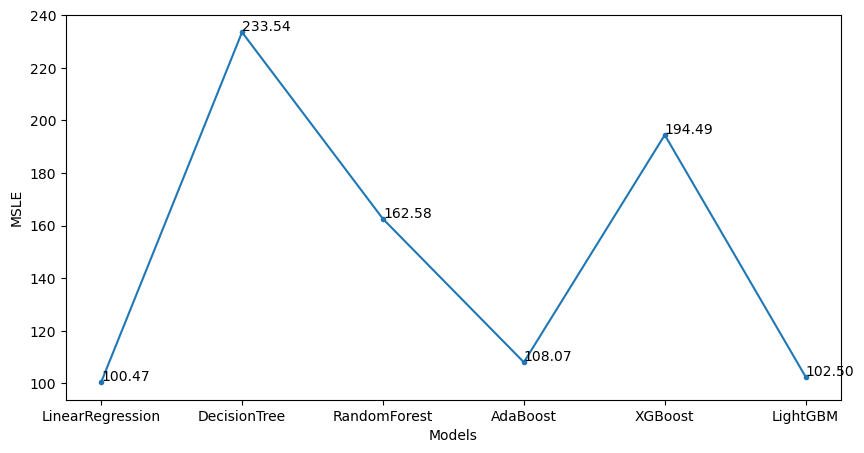

In [88]:
plt.subplots(figsize=(10,5))
plt.plot(compare.Models,compare.MSLE,marker = '.')

for x,y in zip(compare.Models,compare.MSLE):

    label = "{:.2f}".format(y)

    plt.annotate(label, (x,y), 
                 textcoords="offset points",
                xytext=(0,1)) 

plt.xticks(fontsize=10)
plt.yticks( fontsize=10)
plt.xlabel('Models')
plt.ylabel('MSLE')
plt.show()

In [89]:
#The LightGBM model's performance shows a validation score of 102.50 and a training score of 62.96, 
#indicating a decent predictive power with slight overfitting.

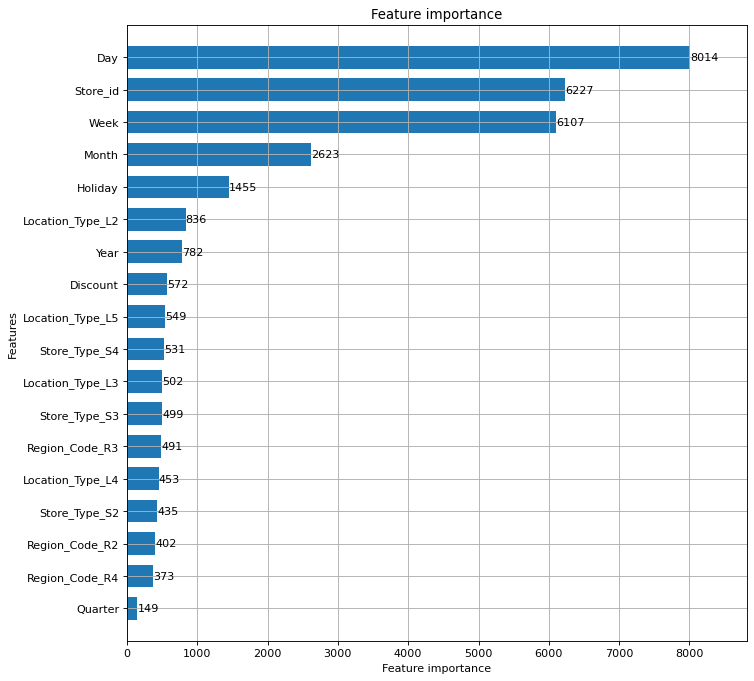

In [90]:
#Feature importance

plot_importance(lgb, height = 0.7, dpi =80, figsize = (10,10))
plt.show()

In [91]:
# Insights:

# Day and Week: These two features have the highest importance scores
# This indicates that the specific day and week are crucial in predicting sales or other target variables. 

In [92]:
# KFold Cross Validation for LightGBM:

from sklearn.model_selection import KFold

# Initialize KFold
Kfolds = KFold(n_splits=5, shuffle=True, random_state=1)

val_score = []
train_score = []
prediction_test = []

for i, (train_index, val_index) in enumerate(Kfolds.split(tr_x, tr_y), start=1):
    x_train, x_val = tr_x.iloc[train_index], tr_x.iloc[val_index]
    y_train, y_val = tr_y.iloc[train_index], tr_y.iloc[val_index]
    
    # Initialize and train the model
    lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, min_child_samples=20,
                          subsample=1.0, colsample_bytree=1.0, num_leaves=20)
    lgbm.fit(x_train, y_train)
    
    # Make predictions
    valid_pred = lgbm.predict(x_val)
    train_pred = lgbm.predict(x_train)
    test_pred = lgbm.predict(test)
    
    # Calculate validation and training scores
    valid_score = mean_squared_log_error(y_val, np.clip(valid_pred, 1e-15, None)) * 1000
    traindata_score = mean_squared_log_error(y_train, np.clip(train_pred, 1e-15, None)) * 1000
    
    print(f"For CV = {i}")
    print(f"Validation Score: {valid_score:.4f}, Train Score: {traindata_score:.4f}")
    
    val_score.append(valid_score)
    train_score.append(traindata_score)
    prediction_test.append(test_pred)

# Output mean scores
print(f"Mean MSLE for Validation: {np.mean(val_score):.4f}")
print(f"Mean MSLE for Train Data: {np.mean(train_score):.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 132860, number of used features: 18
[LightGBM] [Info] Start training from score 40778.228654
For CV = 1
Validation Score: 68.5585, Train Score: 63.6703
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 381
[LightGBM] [Info] Number of data points in the train set: 132860, number of used features: 18
[LightGBM] [Info] Start training from score 40728.229745
For CV = 2
Validation Score: 69.3104, Train Score: 61.3527
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the 

In [93]:
# KFold Cross Validation for Linear Regression:

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=100)

# Initialize lists to store scores and predictions
val_scores = []
train_scores = []
prediction_test = []

for i, (train_index, val_index) in enumerate(kf.split(tr_x, tr_y), start=1):
    x_train, x_val = tr_x.iloc[train_index], tr_x.iloc[val_index]
    y_train, y_val = tr_y.iloc[train_index], tr_y.iloc[val_index]
    
    # Initialize and train the model
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    # Make predictions
    val_pred = model.predict(x_val)
    train_pred = model.predict(x_train)
    test_pred = model.predict(test)  # Ensure 'test' is defined

    # Calculate validation and training scores
    valid_score = mean_squared_log_error(y_val, np.clip(val_pred, 1e-15, None)) * 1000
    train_score = mean_squared_log_error(y_train, np.clip(train_pred, 1e-15, None)) * 1000
    
    print(f"For CV = {i}")
    print(f"Validation Score: {valid_score:.4f}, Train Score: {train_score:.4f}")
    
    val_scores.append(valid_score)
    train_scores.append(train_score)
    prediction_test.append(test_pred)

# Output mean scores
print(f"Mean MSLE for Validation: {np.mean(val_scores):.4f}")
print(f"Mean MSLE for Train Data: {np.mean(train_scores):.4f}")

For CV = 1
Validation Score: 111.0210, Train Score: 110.3671
For CV = 2
Validation Score: 107.2749, Train Score: 111.3933
For CV = 3
Validation Score: 110.4505, Train Score: 110.4224
For CV = 4
Validation Score: 116.6199, Train Score: 108.8974
For CV = 5
Validation Score: 107.1497, Train Score: 111.3198
Mean MSLE for Validation: 110.5032
Mean MSLE for Train Data: 110.4800


In [94]:
#LightGBM scores is better because both the validation and training MSLE values are lower.

In [95]:
import joblib

# Train your model (this part is your existing code)
lgb = LGBMRegressor(n_estimators=500, learning_rate=0.01, min_child_samples=50, 
                    subsample=0.7, colsample_bytree=0.7, num_leaves=63)
lgb.fit(tr_x, tr_y)

# Save the model
joblib.dump(lgb, 'lightgbm_model.pkl')
print("Model saved as lightgbm_model.pkl")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 166075, number of used features: 18
[LightGBM] [Info] Start training from score 40757.037818
Model saved as lightgbm_model.pkl
